In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import various libraries used to clean and present data

In [2]:
 df = pd.read_csv("day8_sales.csv") #read in the data on the csv as df
df

,date,customer,region,sales,quantity,product
0,2024-01-03,Alice,East,1200.0,3.0,Monitor
1,2024-01-05,Bob,West,800.0,2.0,Keyboard
2,2024-01-06,Charlie,South,NaN,1.0,Mouse
3,2024-01-07,Diana,East,1500.0,5.0,Monitor
4,2024-01-08,Edward,North,700.0,2.0,Mouse
5,2024-01-10,Frank,West,1300.0,NaN,Laptop
6,2024-01-11,Grace,North,900.0,3.0,Keyboard
7,2024-01-12,Hank,South,2000.0,4.0,Laptop
8,2024-01-13,Irene,East,NaN,1.0,Monitor
9,2024-01-14,Jack,West,1100.0,2.0,Monitor


In [3]:
df.info() #show info about the data such as data type and amount per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      10 non-null     object 
 1   customer  10 non-null     object 
 2   region    10 non-null     object 
 3   sales     8 non-null      float64
 4   quantity  9 non-null      float64
 5   product   10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 612.0+ bytes


In [4]:
df['date'] = pd.to_datetime(df['date']) #convert the string type date to datetime objects

In [6]:
df['sales'] = pd.to_numeric(df['sales'], errors = 'coerce') #turn non valid data types into NaN 
df['quantity'] = pd.to_numeric(df['quantity'], errors = 'coerce') 

In [7]:
df['sales'] = df['sales'].fillna(df['sales'].mean()) #replace the NaN data types into the mean for sales and median for quantity
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

In [16]:
df['unit price'] = df['sales']/df['quantity'] #create a new column for unit price
df


,date,customer,region,sales,quantity,product,unit price
0,2024-01-03,Alice,East,1200.0,3.0,Monitor,400.0
1,2024-01-05,Bob,West,800.0,2.0,Keyboard,400.0
2,2024-01-06,Charlie,South,1187.5,1.0,Mouse,1187.5
3,2024-01-07,Diana,East,1500.0,5.0,Monitor,300.0
4,2024-01-08,Edward,North,700.0,2.0,Mouse,350.0
5,2024-01-10,Frank,West,1300.0,2.0,Laptop,650.0
6,2024-01-11,Grace,North,900.0,3.0,Keyboard,300.0
7,2024-01-12,Hank,South,2000.0,4.0,Laptop,500.0
8,2024-01-13,Irene,East,1187.5,1.0,Monitor,1187.5
9,2024-01-14,Jack,West,1100.0,2.0,Monitor,550.0


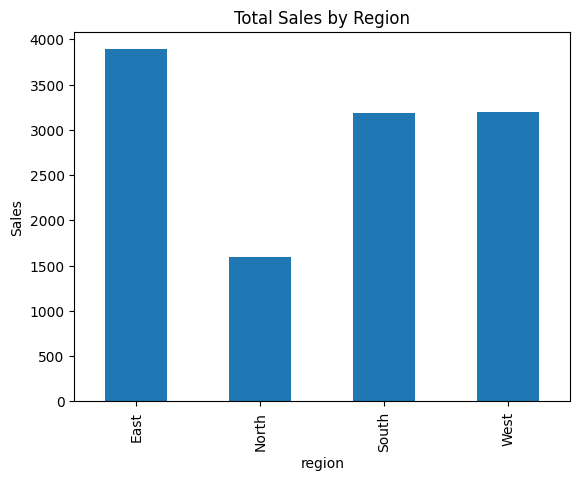

In [10]:
df.groupby('region')['sales'].sum().plot(kind='bar') #make a bar plot that shows sales by region
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()


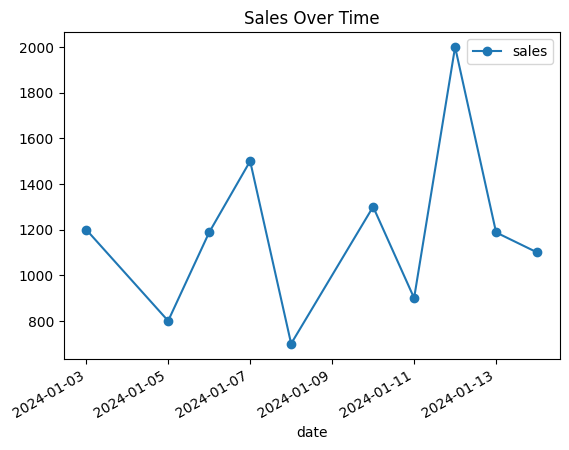

In [11]:
df.plot(x='date',y='sales',kind='line',marker='o') #make a line plot showing sales over time
plt.title('Sales Over Time')
plt.show()

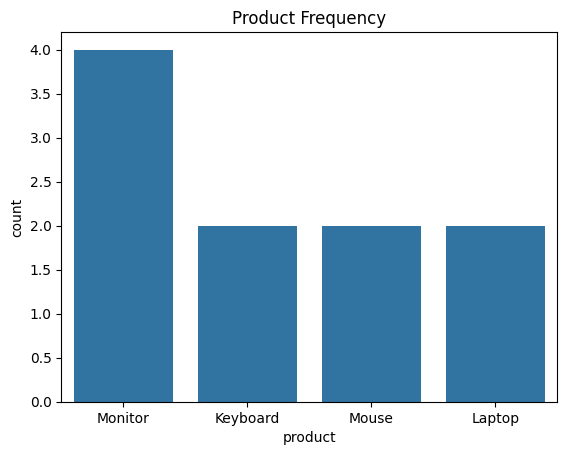

In [12]:
sns.countplot(data=df, x='product') #show a count plot of the count of products sold based on their type
plt.title('Product Frequency')
plt.show()

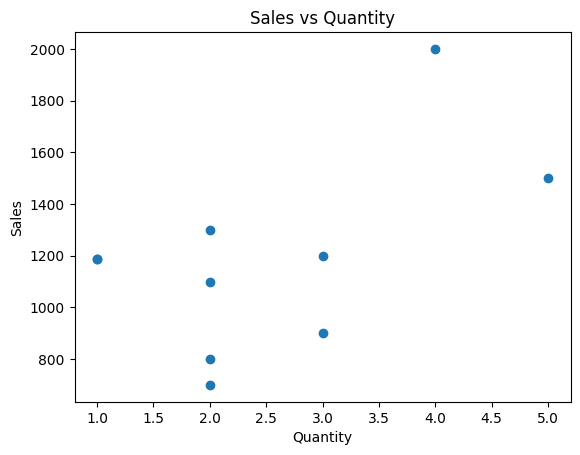

In [13]:
plt.scatter(df['quantity'],df['sales']) #make a scatter plot of sales vs quantity
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Sales vs Quantity')
plt.show()

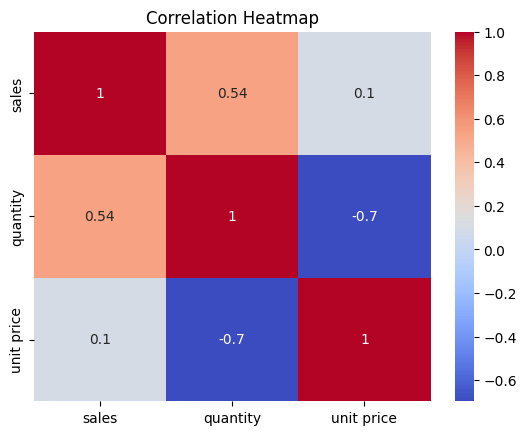

In [17]:
sns.heatmap(df[['sales','quantity','unit price']].corr(),annot=True,cmap="coolwarm") #show the correlation via a heatmap between sales,quantity,unitprice
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# 1) Which region ahd the highest total sales?
#     East
# 2)Which Product sold the most units?
#     Monitor
# 3) Is there a relationship between quantity and sales?
#     0.54 positive correlation so yes there is a positive relationship between sales and quantity.
# 4) Which day had the highest sales?
#     1/12
# 5)Who was the highest spending customer?
#     Hank
# 6)Which product generates the highest unit price?
#     Monitor and mouse are equal
df.to_csv("day8_sales_clean.csv", index = False) #export the cleaned data and new data (unit price) to new csv file type